In [80]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    class_sep=3,   
    random_state=42
)

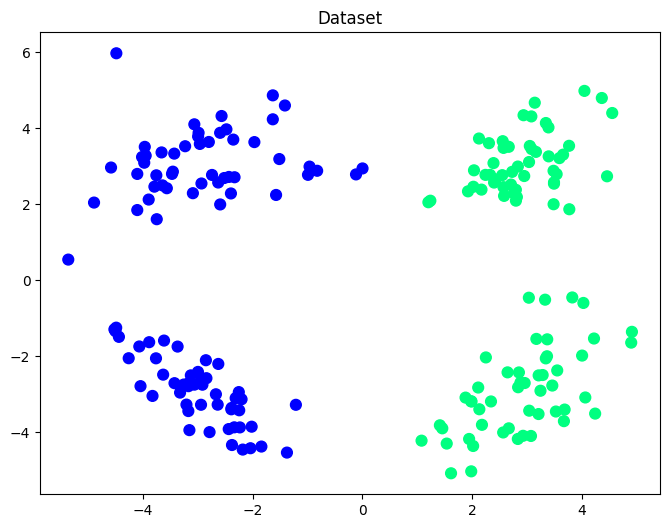

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=60)
plt.title("Dataset")
plt.show()

In [82]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:] 

In [83]:
def step(z):
    return 1 if z>0 else 0

In [84]:
intercept_,coef_ = perceptron(X,y)

In [85]:
print(coef_)
print(intercept_)

[1.54048262 0.14978876]
1.0


In [86]:
## ploting the decision boundary after 1000 updation

In [87]:
intercept_, coef_ = perceptron(X, y)

In [88]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

In [89]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
x_input = np.linspace(x_min, x_max, 100)

y_input = m * x_input + b

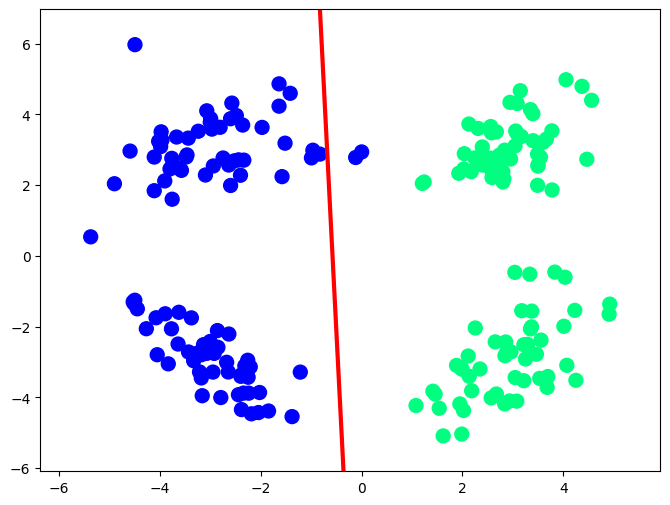

In [90]:
plt.figure(figsize=(8,6))
plt.plot(x_input, y_input, color='red' , linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.xlim(x_min, x_max)
plt.ylim(X[:,1].min()-1, X[:,1].max()+1)
plt.show()

#### Perceptron boundary vs Logistic Regression

In [91]:
intercept_p, coef_p = perceptron(X, y)

In [92]:
m_p = -(coef_p[0] / coef_p[1])
b_p = -(intercept_p / coef_p[1])

In [93]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X, y)

LogisticRegression()

In [94]:
m_l = -(lor.coef_[0][0] / lor.coef_[0][1])
b_l = -(lor.intercept_[0] / lor.coef_[0][1])

In [95]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
x_input = np.linspace(x_min, x_max, 100)

y_input_p = m_p * x_input + b_p
y_input_l = m_l * x_input + b_l

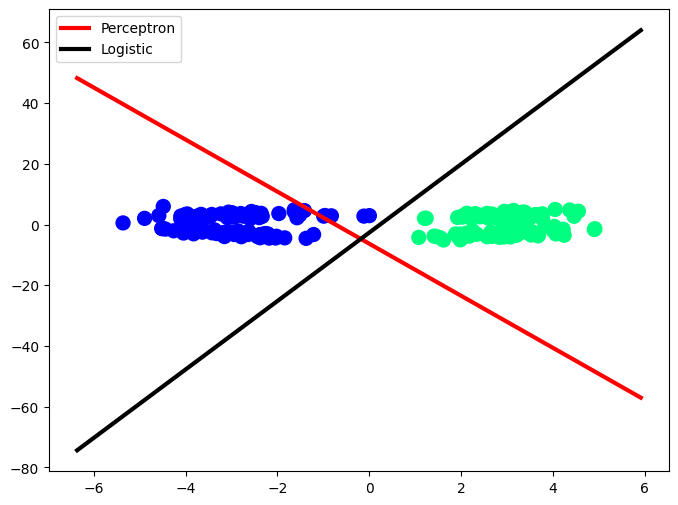

In [96]:
plt.figure(figsize=(8,6))

plt.plot(x_input, y_input_p, color='red', linewidth=3, label='Perceptron')
plt.plot(x_input, y_input_l, color='black', linewidth=3, label='Logistic')

plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)

plt.legend()
plt.show()

##### note : 
| Model               | Scaling Required?    |
| ------------------- | -------------------- |
| Logistic Regression | Strongly Recommended |
| Perceptron          | Very Important       |
| SVM                 | Critical             |
| Tree Models         | Not needed           |


#### animation 

In [116]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

In [118]:
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    class_sep=1.0,
    random_state=42
)

In [119]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [120]:
def step(z):
    return 1 if z >= 0 else 0

In [121]:
def perceptron(X, y, epochs=2000, lr=0.1):

    X = np.insert(X, 0, 1, axis=1)  # add bias term
    weights = np.ones(X.shape[1])

    history = []

    for _ in range(epochs):
        j = np.random.randint(0, X.shape[0])

        y_hat = step(np.dot(X[j], weights))

        if y[j] != y_hat:
            weights = weights + lr * (y[j] - y_hat) * X[j]
            history.append(weights.copy())

    return weights, history

In [122]:
final_weights, history = perceptron(X, y)

print("Total updates:", len(history))


Total updates: 383


In [123]:
m = []
b = []

for w in history:
    # avoid division by zero
    if w[2] != 0:
        m.append(-(w[1] / w[2]))
        b.append(-(w[0] / w[2]))

In [129]:
from IPython.display import HTML

In [134]:
fig, ax = plt.subplots(figsize=(8,5))

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

x_vals = np.linspace(x_min, x_max, 100)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

ax.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=50)

line, = ax.plot(x_vals, m[0]*x_vals + b[0], 'r-', linewidth=2)

def update(i):
    line.set_ydata(m[i] * x_vals + b[i])
    ax.set_title(f"Perceptron Update: {i+1}")
    return line,

ani = FuncAnimation(
    fig,
    update,
    frames=min(len(m), 100),
    interval=100,
    repeat=False
)

HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>